# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset, identified as [DANDI:001361](https://dandiarchive.org/dandiset/001361/0.250406.0045), contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. It is associated with the publication:

Sosa, Marielena; Plitt, Mark H.; Giocomo, Lisa M. (2025) A flexible hippocampal population code for experience relative to reward (Version 0.250406.0045) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001361/0.250406.0045

The study investigated how hippocampal ensembles flexibly encode multiple aspects of experience while amplifying behaviorally relevant information, particularly in relation to reward locations.

**Key measurements include:** TwoPhotonSeries, PlaneSegmentation, BehavioralTimeSeries.
**Techniques used:** Two-photon microscopy, behavioral tasks in virtual reality.

## What this notebook covers

This notebook will guide you through:
1. Listing required Python packages.
2. Loading the Dandiset metadata using the DANDI API.
3. Selecting and loading an NWB (Neurodata Without Borders) file from the Dandiset.
4. Exploring basic metadata and structure of the NWB file.
5. Visualizing some of the behavioral data (e.g., mouse position).
6. Visualizing some of the optical physiology (ophys) data, including:
    - Calcium imaging field of view (mean and max projection images).
    - ROI masks.
    - Fluorescence traces from selected ROIs.
7. Providing a brief summary and potential next steps for analysis.

## Required Packages

To run this notebook, you will need the following Python packages installed. This notebook assumes they are already present in your environment.

- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for reading NWB files)
- `h5py` (NWB dependency, for HDF5 file access)
- `remfile` (for streaming remote files)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `seaborn` (for enhanced plot styling)

## Loading the Dandiset with DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001361"
dandiset_version = "0.250406.0045"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}") # This is the general dandiset URL
print(f"Dandiset DOI: {metadata.get('doi', 'Not available')}")
print(f"Dandiset description: {metadata.get('description', 'No description available.')[:200]}...")


# List some assets in the Dandiset
print("\nFirst 5 assets:")
for asset in islice(dandiset.get_assets(), 5):
    # Each 'asset' is a RemoteAsset object (RemoteBlobAsset or similar)
    path = asset.path
    asset_id = asset.identifier # Should be 'identifier' for these asset objects
    print(f"- {path} (ID: {asset_id})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045
Dandiset DOI: 10.48324/dandi.001361/0.250406.0045
Dandiset description: 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience rel...

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)


## Loading an NWB File

We will now load one specific NWB file from the Dandiset for a closer look. We'll use the file `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`.
The asset ID for this file is `d77ea78a-8978-461d-9d11-3c5cef860d82`.

The direct download URL for this asset is:
`https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/`

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn styling for most plots
sns.set_theme()

# Define the URL for chosen NWB file
nwb_asset_id = "d77ea78a-8978-461d-9d11-3c5cef860d82"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"

print(f"Loading NWB file from: {nwb_file_url}")

# Load the NWB file using remfile for remote streaming
# This avoids downloading the entire file at once.
# We need to keep h5_file and remote_file open while NWBHDF5IO is in use.
# For simplicity in a notebook, we'll load and then can choose to close later if memory is a concern.
# We will define them here and use them across cells. A final cell will be added to demonstrate proper closing.
remote_f = remfile.File(nwb_file_url)
h5_f = h5py.File(remote_f, mode='r') # Ensure mode is 'r' for reading
io = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True) #load_namespaces is good practice
nwbfile = io.read()

print("\nNWB file loaded successfully.")
print(f"Identifier: {nwbfile.identifier}")
print(f"Session description: {nwbfile.session_description}")
print(f"Session start time: {nwbfile.session_start_time}")
print(f"Experimenter: {nwbfile.experimenter}")
print(f"Subject ID: {nwbfile.subject.subject_id if nwbfile.subject else 'N/A'}")

Loading NWB file from: https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.
Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session description: processed suite2p data
Session start time: 2023-02-23 00:00:00-08:00
Experimenter: ('Mari Sosa',)
Subject ID: m11


### NWB File Contents Summary

Here's a brief overview of the data groups found in this NWB file:

- **`acquisition`**: Raw acquired data.
    - `TwoPhotonSeries`: Raw two-photon imaging data dimensions and metadata.
        - `data`: (Dataset, shape usually indicates frames, height, width, or time, x, y)
        - `imaging_plane`: Details about the imaged plane (e.g., location, indicator).
- **`processing`**: Processed data modules.
    - **`behavior`**: Behavioral data.
        - `BehavioralTimeSeries`: Contains various time series related to behavior.
            - `Reward`: Timing and amount of rewards.
            - `autoreward`: Information on automatic rewards.
            - `environment`: Virtual reality environment details.
            - `lick`: Lick sensor data.
            - `position`: Animal's position on the track. (cm)
            - `reward_zone`: Entry into reward zones.
            - `scanning`: Indicator if ophys scanning occurred.
            - `speed`: Animal's speed. (cm/s)
            - `teleport`: Trial end indicator.
            - `trial number`: Trial number.
            - `trial_start`: Trial start indicator.
    - **`ophys`**: Optical physiology processed data.
        - `Backgrounds_0`: Background images from imaging.
            - `Vcorr`: Correlation image. (GrayscaleImage)
            - `max_proj`: Maximum intensity projection. (GrayscaleImage)
            - `meanImg`: Mean intensity image. (GrayscaleImage)
        - `Deconvolved`: Deconvolved fluorescence traces.
            - `plane0`: `RoiResponseSeries` with deconvolved activity.
        - `Fluorescence`: Fluorescence traces (e.g., F_raw or F_neuropil_corrected).
            - `plane0`: `RoiResponseSeries` with fluorescence activity.
                - `data`: (Dataset, shape: time_points x num_rois)
                - `rois`: Link to the `PlaneSegmentation` table defining the ROIs.
        - `ImageSegmentation`: Information about segmented regions of interest (ROIs).
            - `PlaneSegmentation`: Table containing ROI masks and properties.
                - `id`: Unique identifier for each ROI.
                - `pixel_mask`: Defines the pixels belonging to each ROI. The actual mask data (y, x, weight) for each ROI can be accessed by indexing this column, e.g., `PlaneSegmentation['pixel_mask'][0]`.
                - `iscell`: A column often present from segmentation suites like Suite2p, typically containing boolean values or probabilities indicating if an ROI is classified as a cell. This can be used to filter for high-quality cellular ROIs.
                - Other columns might include `image_mask` (a 2D binary mask), `neuropil_mask`, etc.
        - `Neuropil`: Neuropil fluorescence traces (if separated).
            - `plane0`: `RoiResponseSeries` for neuropil signals.
- **`devices`**: Information about experimental devices (e.g., microscope).
- **`imaging_planes`**: Detailed parameters of the imaging planes.
- **`subject`**: Information about the experimental subject (e.g., species, age, ID).

For detailed exploration of NWB file contents, Neurodata Widgets or direct inspection of `nwbfile` attributes in Python are very useful.

### Explore this NWB file on Neurosift

You can also explore the contents of this specific NWB file interactively on Neurosift using the following link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045)

## Visualizing Behavioral Data: Mouse Position

Let's plot the mouse's position on the virtual track over time.

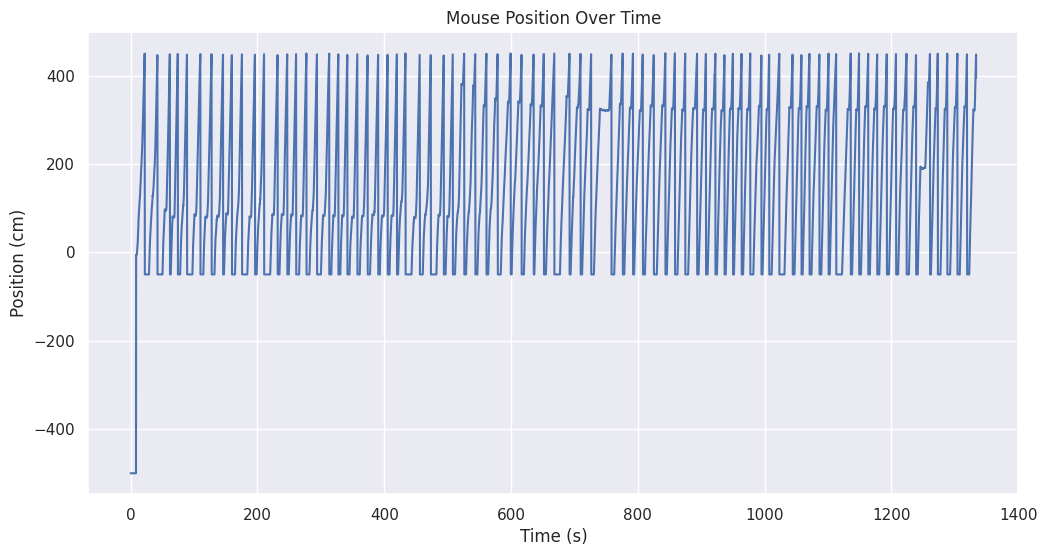

In [3]:
# Access position data and timestamps
position_timeseries = nwbfile.processing['behavior'].data_interfaces['BehavioralTimeSeries'].time_series['position']
pos_data = position_timeseries.data[:]
pos_timestamps = position_timeseries.timestamps[:]

plt.figure(figsize=(12, 6))
plt.plot(pos_timestamps, pos_data)
plt.xlabel('Time (s)')
plt.ylabel(f'Position ({position_timeseries.unit})')
plt.title('Mouse Position Over Time')
plt.grid(True)
plt.show()

The plot above shows the mouse's movement along the linear track. We can observe a repetitive pattern, likely corresponding to laps or traversals of the track.

## Visualizing Optical Physiology (Ophys) Data

Now, let's look at some of the two-photon imaging data.

### Mean and Maximum Intensity Projection Images

These images give an overview of the imaging field of view. The mean image shows the average intensity, while the max projection highlights the brightest pixels over time (often revealing cell bodies).

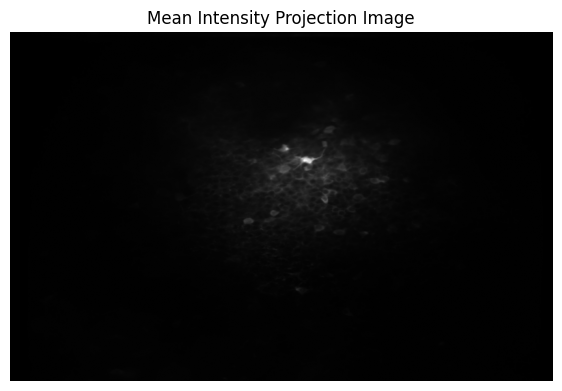

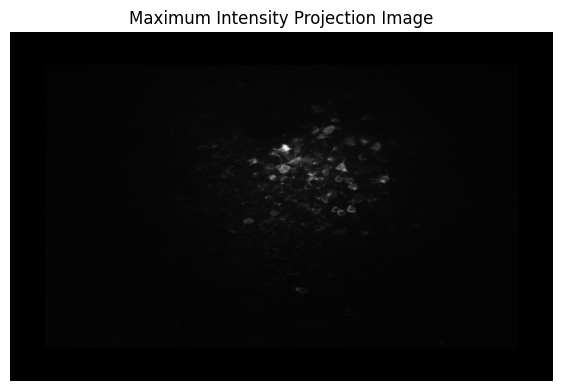

In [4]:
# Plot Mean Image
mean_img_data = nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'].images['meanImg'].data[:]

plt.figure(figsize=(7, 7))
# No seaborn theme for these raw images
plt.style.use('default') # override seaborn for this cell
plt.imshow(mean_img_data, cmap='gray')
plt.title('Mean Intensity Projection Image')
plt.axis('off')
plt.show()

# Plot Max Projection Image
max_proj_data = nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'].images['max_proj'].data[:]

plt.figure(figsize=(7, 7))
plt.imshow(max_proj_data, cmap='gray')
plt.title('Maximum Intensity Projection Image')
plt.axis('off')
plt.show()

# Revert to seaborn theme for subsequent plots
sns.set_theme()

The images above show the field of view. Individual cells are often visible as brighter spots, especially in the maximum intensity projection.

### ROI Masks

Regions of Interest (ROIs) are identified, typically corresponding to individual neurons. Let's visualize these masks overlaid on the mean image.
The `PlaneSegmentation` table stores the `pixel_mask` for each ROI. Each entry in `pixel_mask` is a list of (y, x, weight) values for the pixels belonging to that ROI.

Found 349 ROIs. Visualizing all ROI masks.


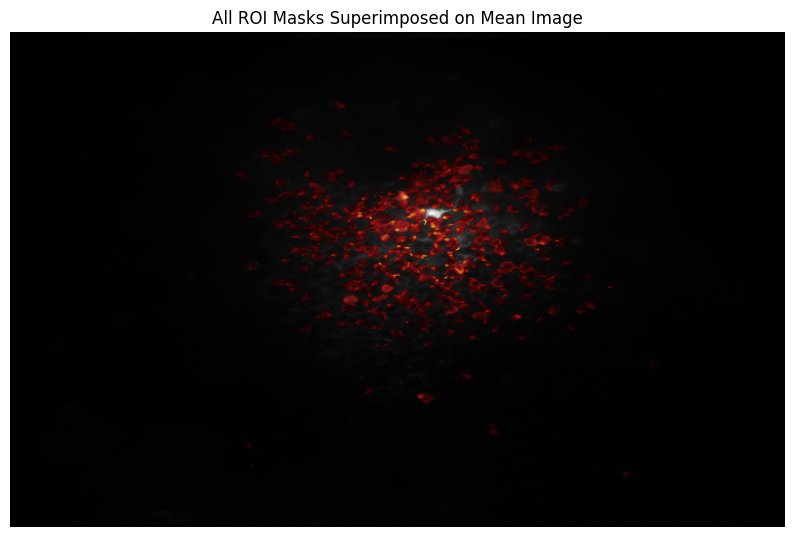

In [5]:
plane_segmentation = nwbfile.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
imaging_plane_dims = tuple(nwbfile.acquisition['TwoPhotonSeries'].dimension[:]) # (height, width)

# Create an empty array for the combined ROI masks
combined_roi_mask_img = np.zeros(imaging_plane_dims, dtype=float)
num_rois_total = len(plane_segmentation.id)

print(f"Found {num_rois_total} ROIs. Visualizing all ROI masks.")

for i in range(num_rois_total):
    pixel_mask_data = plane_segmentation['pixel_mask'][i]
    for y, x, weight in pixel_mask_data:
        if 0 <= int(y) < imaging_plane_dims[0] and 0 <= int(x) < imaging_plane_dims[1]:
            combined_roi_mask_img[int(y), int(x)] = max(combined_roi_mask_img[int(y), int(x)], weight)

plt.figure(figsize=(10, 10 * imaging_plane_dims[0]/imaging_plane_dims[1] if imaging_plane_dims[1] > 0 else 10))
# No seaborn theme for this specific plot to better see mask overlay color
plt.style.use('default')
plt.imshow(mean_img_data, cmap='gray', aspect='auto')
masked_roi_img = np.ma.masked_where(combined_roi_mask_img == 0, combined_roi_mask_img)
plt.imshow(masked_roi_img, cmap='hot', alpha=0.6, aspect='auto')
plt.title('All ROI Masks Superimposed on Mean Image')
plt.axis('off')
plt.show()

# Revert to seaborn theme
sns.set_theme()

The image above shows the detected ROIs (in color) overlaid on the mean image of the field of view. This helps to confirm that the ROIs correspond to cellular structures.

### Fluorescence Traces

Let's plot the fluorescence traces from a few selected ROIs. We'll use the `Fluorescence` data, which could be raw or neuropil-corrected traces. For this example, we'll plot a short segment for a few ROIs.

Plotting fluorescence for the first 5 ROIs over 32.18 seconds.


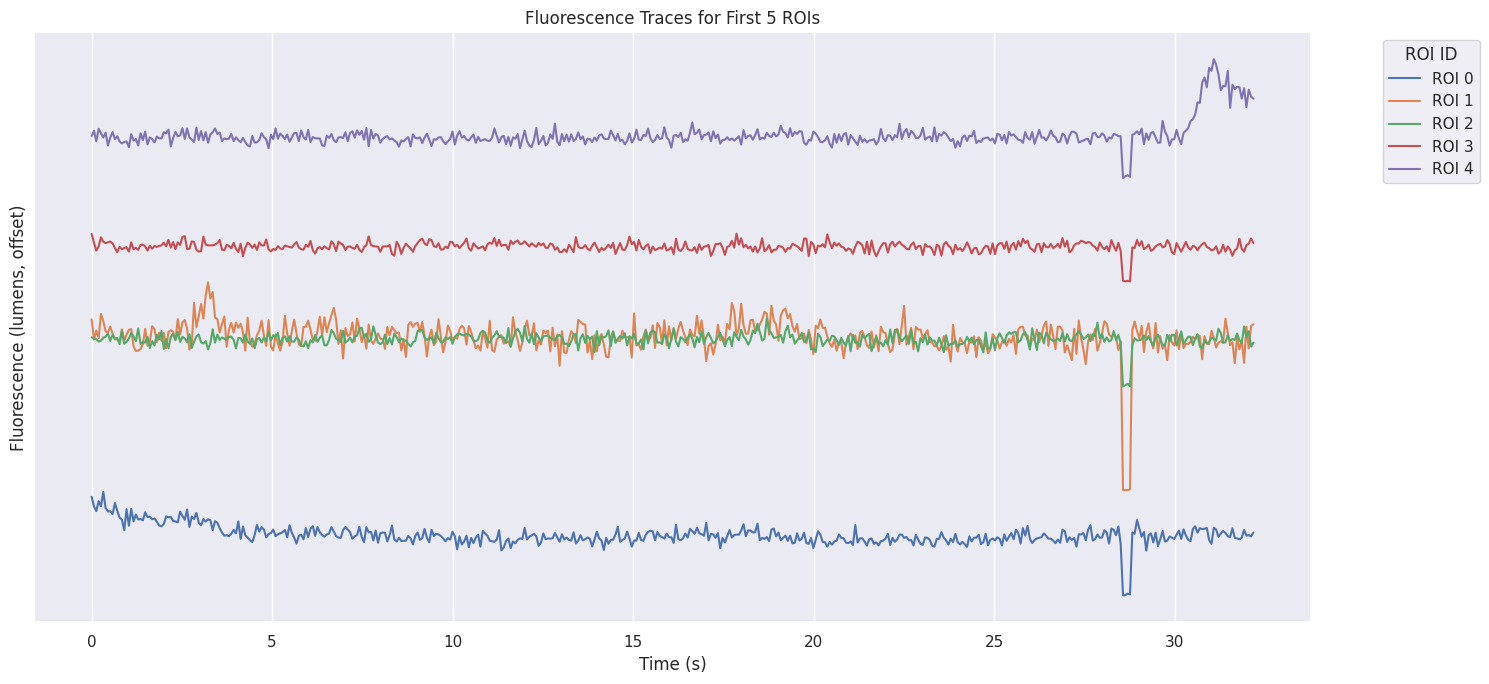

In [6]:
fluorescence_timeseries = nwbfile.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['plane0']

# Select a few ROIs and a time window
num_rois_to_plot = 5
time_points_to_plot = 500  # Approx 32 seconds given a ~15.5 Hz sampling rate

if fluorescence_timeseries.data.shape[1] < num_rois_to_plot:
    print(f"Warning: Only {fluorescence_timeseries.data.shape[1]} ROIs available, plotting all of them.")
    num_rois_to_plot = fluorescence_timeseries.data.shape[1]

# Ensure we don't try to plot more timepoints than available
if fluorescence_timeseries.data.shape[0] < time_points_to_plot:
    time_points_to_plot = fluorescence_timeseries.data.shape[0]

selected_rois_data = fluorescence_timeseries.data[:time_points_to_plot, :num_rois_to_plot]

sampling_rate = fluorescence_timeseries.rate
timestamps_fluor = np.arange(time_points_to_plot) / sampling_rate

print(f"Plotting fluorescence for the first {num_rois_to_plot} ROIs over {timestamps_fluor[-1]:.2f} seconds.")

plt.figure(figsize=(15, 7))
for i in range(num_rois_to_plot):
    # Offset traces for better visualization
    # Using a more robust offset based on the range of the data
    trace_offset = np.ptp(selected_rois_data) * 0.5 * i if np.ptp(selected_rois_data) > 0 else i
    plt.plot(timestamps_fluor, selected_rois_data[:, i] + trace_offset, label=f'ROI {plane_segmentation.id[i]}')

plt.xlabel('Time (s)')
plt.ylabel(f'Fluorescence ({fluorescence_timeseries.unit}, offset)')
plt.title(f'Fluorescence Traces for First {num_rois_to_plot} ROIs')
plt.legend(title="ROI ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks([]) # Remove y-axis ticks as traces are offset and arbitrary units
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

The plot shows the fluorescence activity of the first few ROIs over a short period. Changes in fluorescence intensity over time reflect the neural activity (calcium dynamics) of these cells. Some traces show clear events (increases in fluorescence), while others might show baseline activity or noise. Note that artifacts, such as synchronized deflections, can sometimes be present in these raw traces.

For a more in-depth analysis, one could plot these fluorescence traces alongside behavioral variables (like position or speed) over the same time window to look for correlations. Selecting ROIs based on specific criteria (e.g., high activity, specific location, or `iscell` probability) rather than just the first few can also provide more targeted insights.

## Summary and Future Directions

This notebook demonstrated how to:
- Access and understand basic metadata of Dandiset 001361.
- Load a specific NWB file from the Dandiset using its remote URL.
- Inspect the structure and some key metadata of the NWB file.
- Visualize behavioral data (mouse position).
- Visualize ophys data, including the imaging field of view, ROI masks, and fluorescence traces.

**Possible Future Directions for Analysis:**

1.  **Correlate Neural Activity with Behavior:** Investigate how the activity of individual neurons or populations relates to the mouse's position, speed, or specific behavioral events like reward consumption or trial boundaries.
2.  **Place Cell Analysis:** Identify "place cells" – neurons that fire preferentially when the animal is in a specific location on the track.
3.  **Population Dynamics:** Analyze the collective activity of many neurons to understand how the hippocampal population encodes information about the environment and task variables. The Dandiset description mentions a "reward-relative representation," which would be a key aspect to explore.
4.  **Event-Triggered Averages:** Align neural activity to specific behavioral events (e.g., reward zone entry, teleport) to see consistent neural responses.
5.  **Explore Deconvolved Traces:** The `Deconvolved` data in `nwbfile.processing['ophys']` offers an estimate of spiking activity, which can be more discrete than raw fluorescence and useful for certain types of analyses.
6.  **Comparative Analysis:** Compare neural activity patterns across different trials, sessions, or environmental conditions (if applicable within the Dandiset).

Remember that this Dandiset is rich, and the NWB files contain much more information than shown here. Further exploration using tools like `pynwb` and custom analysis scripts can uncover deeper insights into the hippocampal code for experience and reward.

---

### Cleaning up resources
It's good practice to close file handles when you're done with them, especially for remote files.
The following cell will close the NWB file resources we opened.

In [7]:
# Close the NWB file and related resources
try:
    io.close()
    print("NWBHDF5IO closed.")
except Exception as e:
    print(f"Error closing NWBHDF5IO: {e}")

try:
    h5_f.close()
    print("HDF5 file handle closed.")
except Exception as e:
    print(f"Error closing HDF5 file handle: {e}")

try:
    remote_f.close()
    print("Remote file handle closed.")
except Exception as e:
    print(f"Error closing remote file handle: {e}")

# End of AI-generated notebook.

NWBHDF5IO closed.
HDF5 file handle closed.
Remote file handle closed.
